In [3]:
# Importamos pandas y leemos el registro de compras de una empesa denominada Tienda 12
 
import pandas as pd
import os

path = os.getcwd()

compras = pd.read_csv(path + r"/compras-abril.txt",delimiter = "|")
compras.head()

,RUC,Apellidos y Nombres o Razón social,Periodo,CAR SUNAT,Fecha de emisión,Fecha Vcto/Pago,Tipo CP/Doc.,Serie del CDP,Año,Nro CP o Doc. Nro Inicial (Rango),...,CLU30,CLU31,CLU32,CLU33,CLU34,CLU35,CLU36,CLU37,CLU38,CLU39
0,20412523896,TIENDA 12,202504,1008912484601E0010000010063,23/04/2025,NaN,1,E001,NaN,10063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20412523896,TIENDA 12,202504,1008912484601E0010000010084,24/04/2025,NaN,1,E001,NaN,10084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20412523896,TIENDA 12,202504,1008912484601E0010000010106,28/04/2025,NaN,1,E001,NaN,10106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20412523896,TIENDA 12,202504,1008912484601E0010000010123,29/04/2025,NaN,1,E001,NaN,10123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20412523896,TIENDA 12,202504,2060406070301E0010000000120,30/04/2025,NaN,1,E001,NaN,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Convertimos la fecha de emision y la fecha de vencimiento para que sean manipulables por pandas
compras['Fecha de emisión'] = pd.to_datetime(compras['Fecha de emisión'], format="%d/%m/%y", errors='coerce')
compras['Fecha Vcto/Pago'] = pd.to_datetime(compras['Fecha Vcto/Pago'], format="%d/%m/%y", errors='coerce')

In [79]:
# Concatenamos la columna serie del comprobante  y numero de comprobantes para crear la columna comprobante
compras["comprobante"] = (compras["Serie del CDP"].fillna("").astype(str) + "-" + compras["Nro CP o Doc. Nro Inicial (Rango)"].fillna("").astype(str))

In [80]:
# Calculamos el total de adquisiciones realizadas en cada proveedor
compras_totales = compras.groupby("Apellidos Nombres/ Razón  Social")["Total CP"].sum()

# Los 10 proveedores con mayor facturacion
print(compras_totales.sort_values(ascending=False).head(10))

Apellidos Nombres/ Razón  Social
ZHEJIANG YA ZHI XING AUTOMOBILE COMPONENTS CO., LTD            234917.88
ZHE JIANG CAL IMP AND EXP CO.,LTD                               23039.00
CORPORACION HEYSEN S.A.C.                                       19740.77
CATUSITA TIRE GROUP S.A.                                         8998.48
BANCO DE CREDITO DEL PERU                                        4584.53
DP WORLD CALLAO S.R.L.                                           3541.50
COMPAÑIA INCUBADORA DE SOLUCIONES MOVILES S.A. - CISMO S.A.      2679.98
DP WORLD LOGISTICS S.R.L.                                        2598.99
EUROSHOP S.A.                                                    2423.51
AMORTIGUADORES MASSIMO E.I.R.L.                                  2150.00
Name: Total CP, dtype: float64


In [81]:
# Importando la libreria matplotlib para visualizar graficos
import matplotlib.pyplot as plt
%matplotlib inline

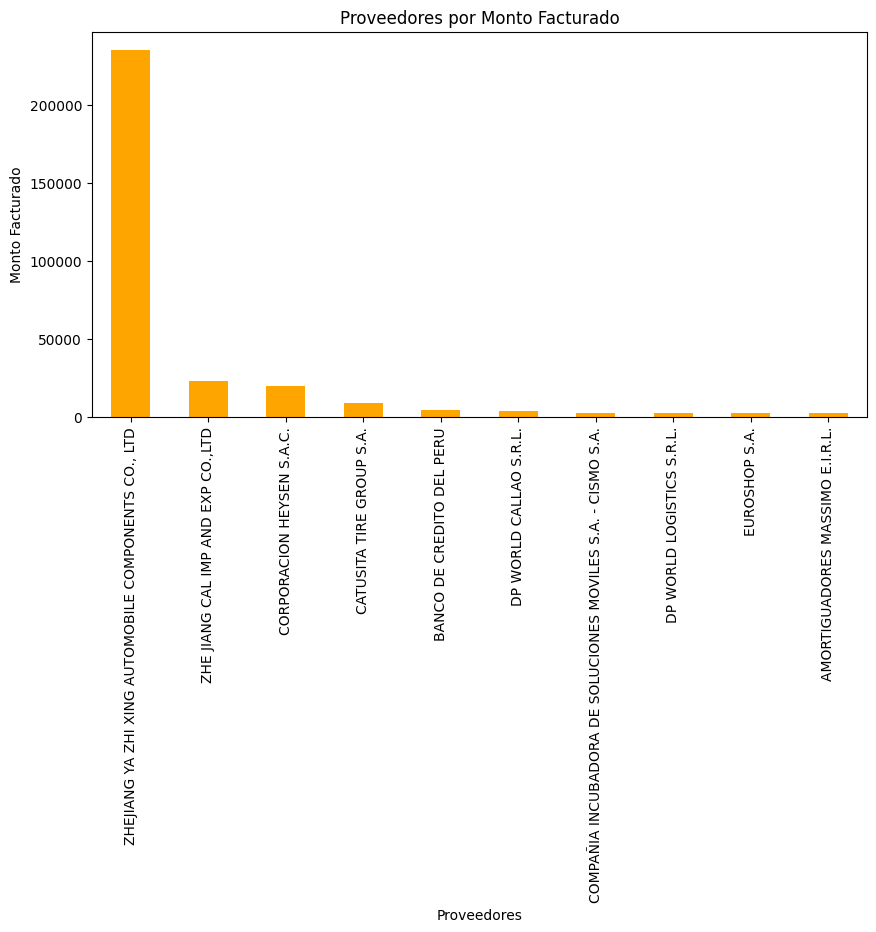

In [82]:
# Mostrando graficamente la adquisiciones del los 10 proveedores con mayor facturacion
compras_totales.sort_values(ascending=False).head(10).plot(kind = "bar", color = "orange",figsize =(10,5));
plt.title("Proveedores por Monto Facturado");
plt.xlabel("Proveedores");
plt.ylabel("Monto Facturado");